# Seismic image visualization

**Author: M.Ravasi**

In this notebook we will visualize images computed by means of Reverse Time Migration (RTM) using the synthetic data modelled from the sharp Volve velocity model.

These images are computed from the following datasets:

- `ifull <-> full_volvesynth`: OBC data with free-surface
- `iup <-> ..`: OBC data with free-surface after up/down separation (upgoing component)
- `inofs <-> nofs_full_volvesynth`: OBC data without free-surface
- `inosea <-> nosea_full_volvesynth`: data from seabed acquisition with seafloor flooding into the sea
- `imdd <-> ..`: data after MDD (should resemble (nosea_full_volvesynth)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import filtfilt

In [2]:
# Vp axes
nx, nz = 1200, 900
dx, dz = 5, 5
ox, oz = 2800, 0
xvp, zvp = np.arange(nx)*dx + ox, np.arange(nz)*dz + oz

# Images axes
nx, nz = 551, 401
dx, dz = 10, 10
ox, oz = 3000, 0
x, z = np.arange(nx)*dx + ox, np.arange(nz)*dz + oz

# Load velocity models
vfile = np.load('../Data/Velocity/Velocities.npz')
vback = vfile['vback'][:, 60:-30]
vp = vfile['v'][:, 60:-30] 

# Load images
ifile = np.load('../Data/Imaging/images.npz')

vpi = ifile['vp']
ifull = ifile['i']
iup = ifile['iup']
inofs = ifile['inofs']
inosea = ifile['inosea']
imdd = ifile['imdd']

# Load acquisition geometry
f = np.load('../Data/Modelling/input_full_volvesynth.npz') 
r = f['r']
s = f['s']

# Artifact removal
nsmooth = 10
smooth=np.ones(nsmooth)/nsmooth

ifull = ifull-filtfilt(smooth,1,filtfilt(smooth,1,ifull).T).T
iup = iup-filtfilt(smooth,1,filtfilt(smooth,1,iup).T).T
inofs = inofs-filtfilt(smooth,1,filtfilt(smooth,1,inofs).T).T
inosea = inosea-filtfilt(smooth,1,filtfilt(smooth,1,inosea).T).T
imdd = imdd-filtfilt(smooth,1,filtfilt(smooth,1,imdd).T).T

## Visualization

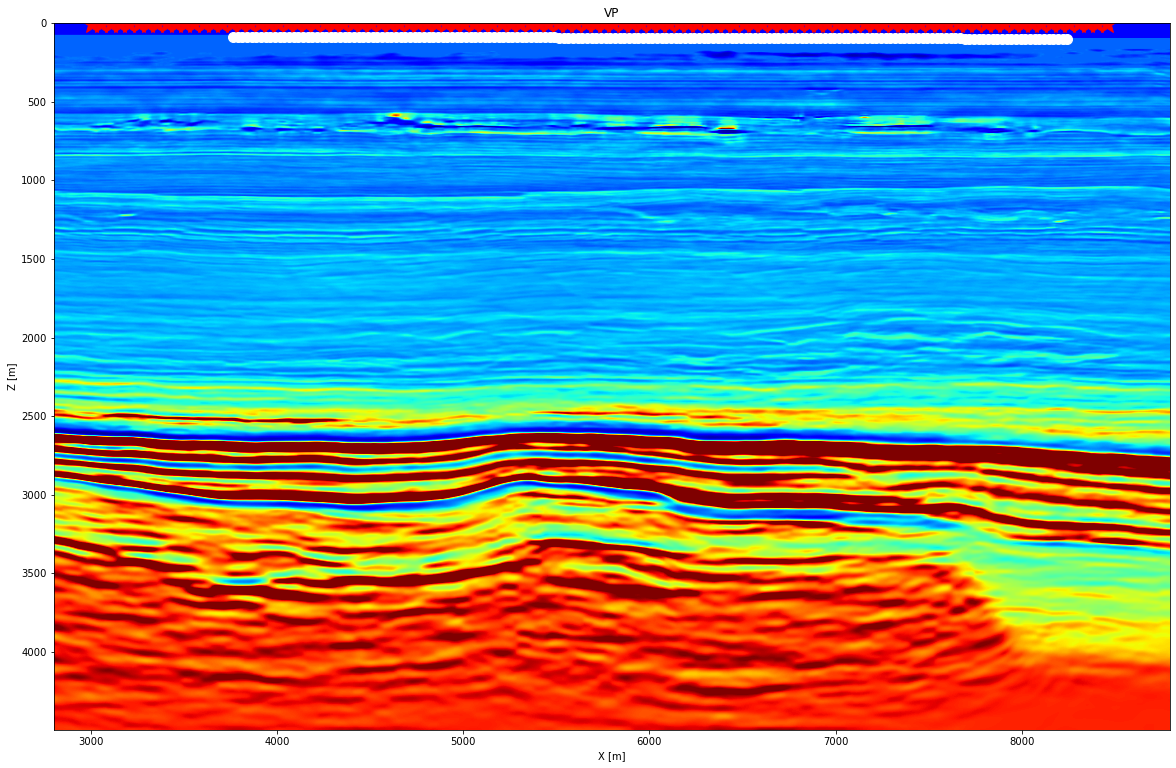

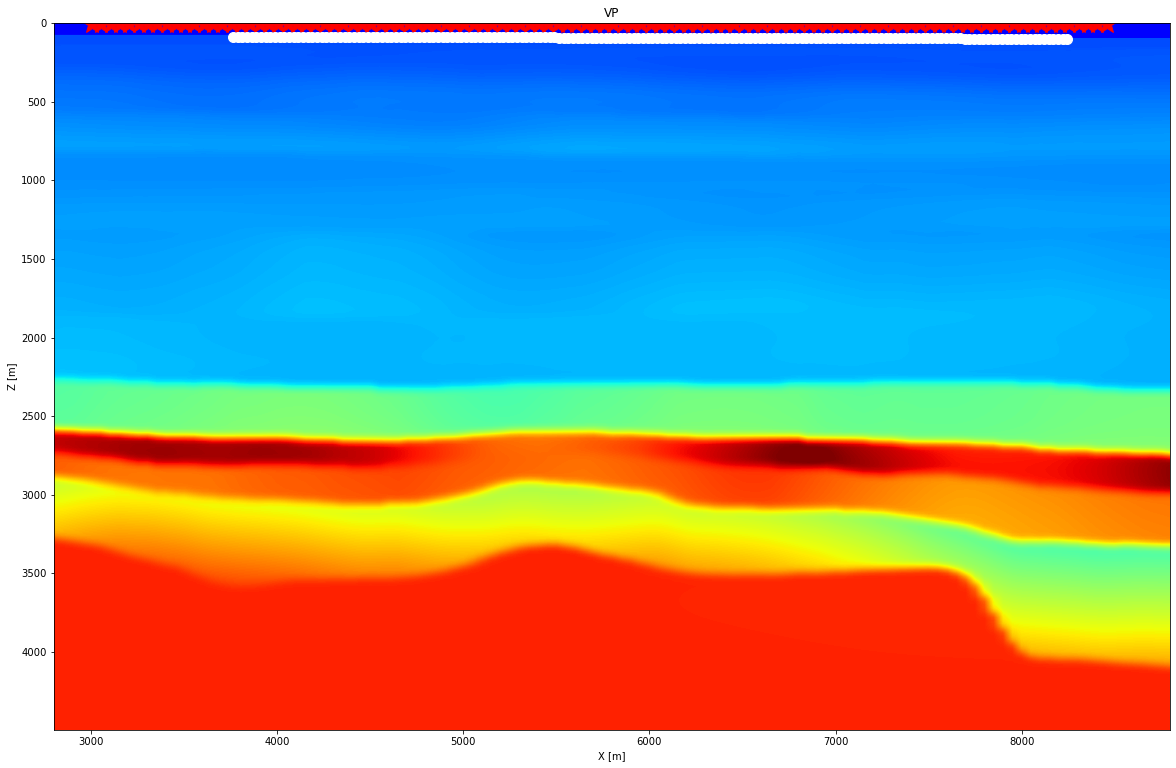

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(20, 13))
ax.imshow(vp, cmap='jet', vmin=1000, vmax=5000, extent=(xvp[0], xvp[-1], zvp[-1], zvp[0]))
ax.plot(s[0], s[1], '*r', ms=20)
ax.plot(r[0], r[1], '.w', ms=20)
ax.set_xlabel(r'X [m]')
ax.set_ylabel(r'Z [m]')
ax.set_title(r'VP')
ax.axis('tight');

fig, ax = plt.subplots(1, 1, figsize=(20, 13))
ax.imshow(vback, cmap='jet', vmin=1000, vmax=5000, extent=(xvp[0], xvp[-1], zvp[-1], zvp[0]))
ax.plot(s[0], s[1], '*r', ms=20)
ax.plot(r[0], r[1], '.w', ms=20)
ax.set_xlabel(r'X [m]')
ax.set_ylabel(r'Z [m]')
ax.set_title(r'VP')
ax.axis('tight');

In [ ]:
clip = 8e1
gain = np.sqrt(z)

fig, ax = plt.subplots(1, 1, figsize=(18, 14))
ax.imshow(vpi, cmap='jet', vmin=1000, vmax=5000, extent=(xvp[0], xvp[-1], zvp[-1], zvp[0]))
ax.plot(s[0], s[1], '*r', ms=20)
ax.plot(r[0], r[1], '.w', ms=20)
ax.set_xlabel(r'X [m]')
ax.set_ylabel(r'Z [m]')
ax.set_title(r'VP')
ax.axis('tight')
ax.set_xlim(3500, x[-1])
ax.set_ylim(z[-1], z[0])
plt.savefig('../Figures/Volve_images_vp.png', dpi=200)

fig, ax = plt.subplots(1, 1, figsize=(18, 14))
ax.imshow(ifull * gain[:, np.newaxis], cmap='gray', vmin=-clip, vmax=clip, 
          interpolation='sinc', extent=(x[0], x[-1], z[-1], z[0]))
ax.plot(s[0], s[1], '*r', ms=20)
ax.plot(r[0], r[1], '.w', ms=20)
ax.set_xlabel(r'X [m]')
ax.set_ylabel(r'Z [m]')
ax.set_title(r'I full')
ax.axis('tight')
ax.set_xlim(3500, x[-1])
plt.savefig('../Figures/Volve_images_full.png', dpi=200)

fig, ax = plt.subplots(1, 1, figsize=(18, 14))
ax.imshow(iup * gain[:, np.newaxis], cmap='gray', vmin=-clip, vmax=clip, 
          interpolation='sinc', extent=(x[0], x[-1], z[-1], z[0]))
ax.plot(s[0], s[1], '*r', ms=20)
ax.plot(r[0], r[1], '.w', ms=20)
ax.set_xlabel(r'X [m]')
ax.set_ylabel(r'Z [m]')
ax.set_title(r'I up')
ax.axis('tight')
ax.set_xlim(3500, x[-1])
plt.savefig('../Figures/Volve_images_up.png', dpi=200)

fig, ax = plt.subplots(1, 1, figsize=(18, 14))
ax.imshow(inofs * gain[:, np.newaxis], cmap='gray', vmin=-clip, vmax=clip, 
          interpolation='sinc', extent=(x[0], x[-1], z[-1], z[0]))
ax.plot(s[0], s[1], '*r', ms=20)
ax.plot(r[0], r[1], '.w', ms=20)
ax.set_xlabel(r'X [m]')
ax.set_ylabel(r'Z [m]')
ax.set_title(r'I nofs')
ax.axis('tight')
ax.set_xlim(3500, x[-1])
plt.savefig('../Figures/Volve_images_nofs.png', dpi=200)

fig, ax = plt.subplots(1, 1, figsize=(18, 14))
ax.imshow(inosea * gain[:, np.newaxis], cmap='gray', vmin=-clip, vmax=clip, 
          interpolation='sinc', extent=(x[0], x[-1], z[-1], z[0]))
ax.plot(r[0], r[1], '*r', ms=20)
ax.plot(r[0], r[1], '.w', ms=20)
ax.set_xlabel(r'X [m]')
ax.set_ylabel(r'Z [m]')
ax.set_title(r'I nofs')
ax.axis('tight')
ax.set_xlim(3500, x[-1])
plt.savefig('../Figures/Volve_images_nosea.png', dpi=200)

clip = 2e-4
fig, ax = plt.subplots(1, 1, figsize=(18, 14))
ax.imshow(imdd * gain[:, np.newaxis], cmap='gray', vmin=-clip, vmax=clip, 
          interpolation='sinc', extent=(x[0], x[-1], z[-1], z[0]))
ax.plot(r[0], r[1], '*r', ms=20)
ax.plot(r[0], r[1], '.w', ms=20)
ax.set_xlabel(r'X [m]')
ax.set_ylabel(r'Z [m]')
ax.set_title(r'I mdd')
ax.axis('tight')
ax.set_xlim(3500, x[-1])
plt.savefig('../Figures/Volve_images_mdd.png', dpi=200);